In [64]:
import stock_analysis
from stock_analysis.utils import group_stocks, describe_group, make_portfolio
import matplotlib.pyplot as plt

In [92]:
reader = stock_analysis.StockReader('2019-01-01', '2022-01-01')

In [93]:
meta, aapl, amzn, nflx, goog = (reader.get_ticker_data(ticker) for ticker in ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'])
sp = reader.get_index_data('S&P 500')
bitcoin = reader.get_bitcoin_data("USD")

In [94]:
meta

,open,high,low,close,adj_close,volume
date,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800
...,...,...,...,...,...,...
2021-12-27,338.850006,347.869995,338.010010,346.179993,346.179993,17795000
2021-12-28,346.630005,352.709991,345.200012,346.220001,346.220001,16637600
2021-12-29,346.910004,349.690002,341.640015,342.940002,342.940002,10747000


In [95]:
reader.available_tickers

['S&P 500',
 'Dow Jones',
 'NASDAQ',
 'S&P/TSX Composite Index',
 'IPC Mexico',
 'IBOVESPA',
 'Euro Stoxx 50',
 'FTSE 100',
 'CAC 40',
 'DAX',
 'IBEX 35',
 'FTSE MIB',
 'OMX Stockholm 30',
 'Swiss Market Index',
 'Nikkei',
 'Hang Seng',
 'CSI 300',
 'S&P BSE SENSEX',
 'S&P/ASX 200',
 'MOEX Russia Index']

In [96]:
faang = group_stocks({'AAPL': aapl, 'AMZN': amzn, 'NFLX': nflx,
                      'GOOG': goog, "Facebook": meta})

faang_sp = group_stocks({'AAPL': aapl, 'AMZN': amzn, 'NFLX': nflx,
                      'GOOG': goog, "Facebook": meta, "S&P 500": sp})


all_assets = group_stocks({'AAPL': aapl, 'AMZN': amzn, 'NFLX': nflx,
                        'GOOG': goog, "Facebook": meta, "S&P 500": sp, "Bitcoin": bitcoin})

In [97]:
describe_group(all_assets).loc["close"]


name,AAPL,AMZN,Bitcoin,Facebook,GOOG,NFLX,S&P 500
count,757.000000,757.000000,1097.000000,757.000000,757.000000,757.000000,757.000000
mean,96.132437,130.236889,21996.377643,245.770026,86.323968,444.641994,3467.868583
std,39.660110,35.949489,19156.682173,65.518128,30.777487,107.889587,639.246478
min,35.547501,75.014000,3399.471680,131.740005,50.803001,254.589996,2237.399902
25%,55.992500,92.177498,8206.145508,188.139999,60.834000,352.209991,2933.679932
50%,91.632500,144.514999,10583.134766,235.940002,73.811501,469.959991,3276.020020
75%,130.360001,164.214005,38347.062500,301.470001,111.237503,523.059998,4063.040039
max,180.330002,186.570496,67566.828125,382.179993,150.709000,691.690002,4793.060059


In [98]:
make_portfolio(faang)

,adj_close,close,high,low,name,open,volume
date,,,,,,,
2019-01-02,570.482330,572.068993,577.256496,547.529484,AAPLAMZNNFLXGOOGFacebook,551.081005,378298500
2019-01-03,562.875889,564.304520,579.139008,556.608986,AAPLAMZNNFLXGOOGFacebook,568.935516,579270300
2019-01-04,603.400394,604.890003,606.179485,575.526405,AAPLAMZNNFLXGOOGFacebook,580.152000,508290600
2019-01-07,623.781212,625.267498,628.305481,606.232498,AAPLAMZNNFLXGOOGFacebook,610.525505,457322600
2019-01-08,635.615856,637.130489,639.743496,618.537003,AAPLAMZNNFLXGOOGFacebook,634.300007,418650200
...,...,...,...,...,...,...,...
2021-12-27,1455.326355,1457.363480,1464.659485,1440.795517,AAPLAMZNNFLXGOOGFacebook,1449.440506,166720100
2021-12-28,1451.303619,1453.329010,1473.000458,1448.491013,AAPLAMZNNFLXGOOGFacebook,1460.297012,170926700
2021-12-29,1446.539108,1448.565491,1462.695740,1438.565002,AAPLAMZNNFLXGOOGFacebook,1454.219528,127159100


# EDA

In [99]:
netflix_viz = stock_analysis.StockVisualizer(nflx)

[Text(0.5, 1.0, 'Netflix Closing Prices'), Text(0, 0.5, 'Price (USD)')]

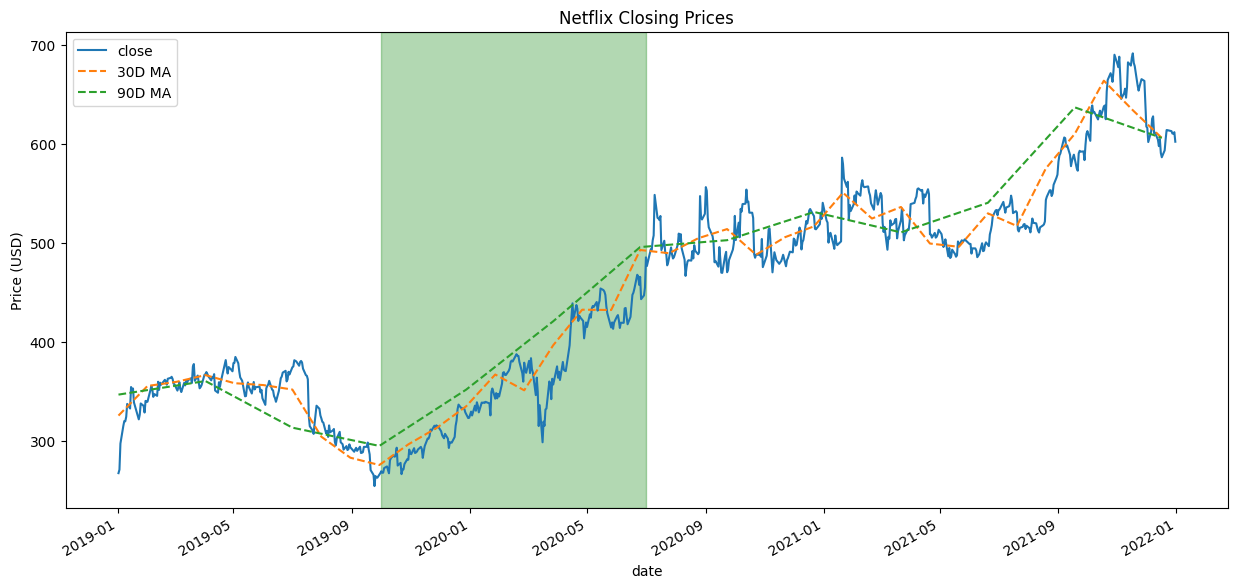

In [100]:
ax = netflix_viz.moving_average("close", ["30D", "90D"])
fig = ax.get_figure()
fig.set_size_inches(15, 7)
netflix_viz.shade_region(ax, x=("2019-10-01", "2020-07-01"), color="green", alpha=0.3)
ax.set(title="Netflix Closing Prices", ylabel="Price (USD)")

### Exponentially weighted moving average (EWMA) puts additional emphasis on more recent values..

[Text(0.5, 1.0, 'Netflix Closing Prices'), Text(0, 0.5, 'Price (USD)')]

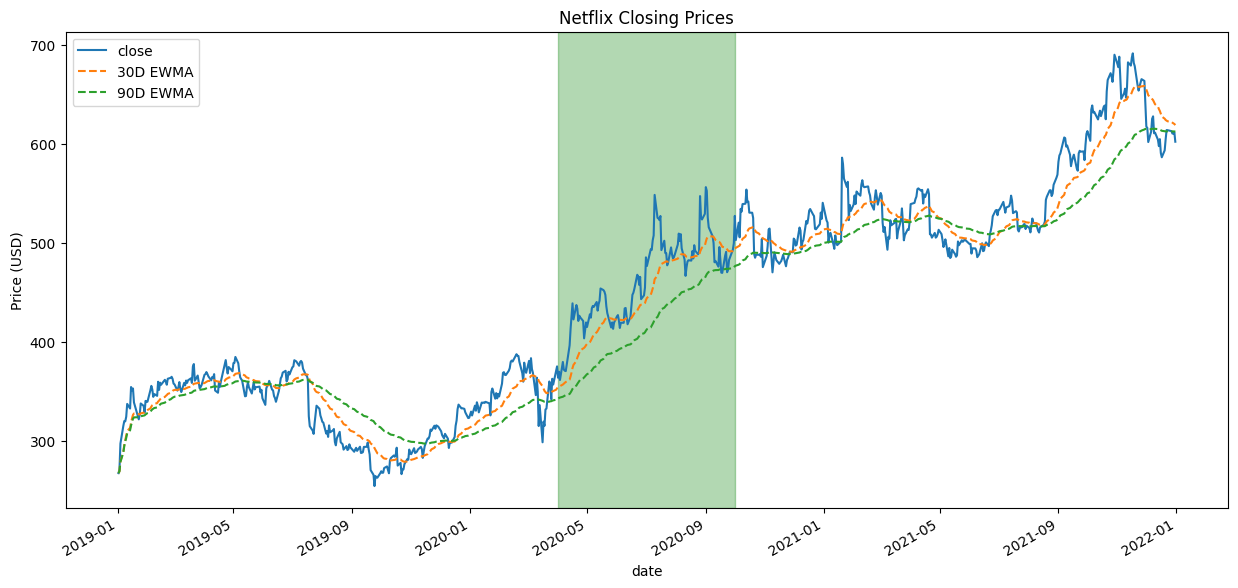

In [101]:
ax = netflix_viz.exp_smoothing("close", [30, 90])
fig = ax.get_figure()
fig.set_size_inches(15, 7)
netflix_viz.shade_region(ax, x=("2020-04-01", "2020-10-01"), color="green", alpha=0.3)
ax.set(title="Netflix Closing Prices", ylabel="Price (USD)")

array([<Axes: title={'center': "After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <Axes: title={'center': 'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

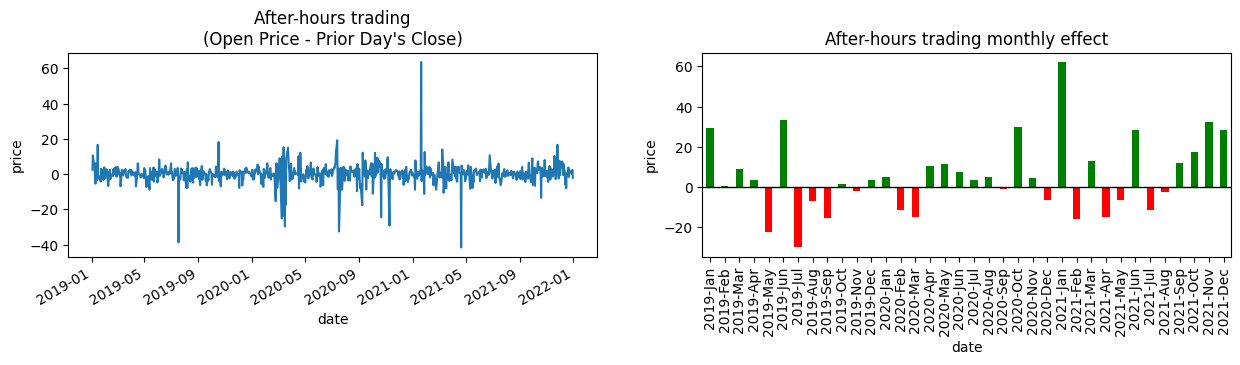

In [102]:
netflix_viz.after_hours_trades()

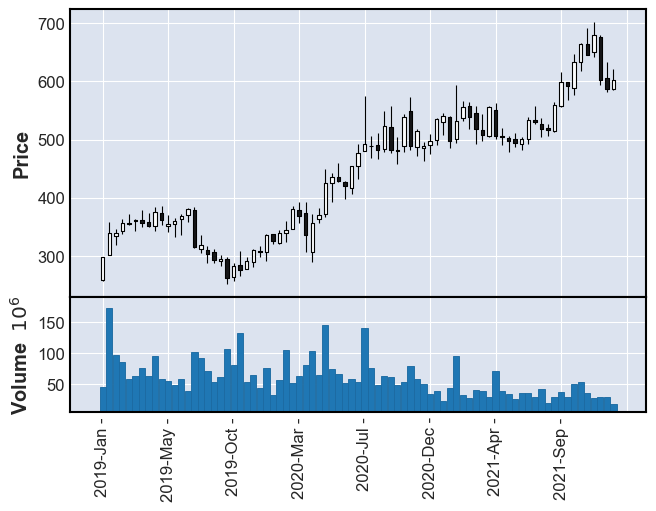

In [103]:
netflix_viz.candlestick(resample='2W', volume=True, xrotation=90, 
                        datetime_format="%Y-%b -")

In [104]:
import matplotlib as mpl
mpl.rcdefaults()

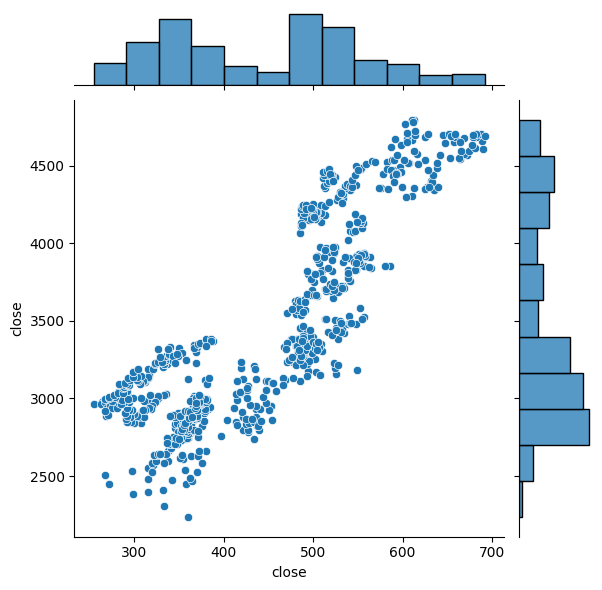

In [105]:
netflix_viz.jointplot(sp, "close")

<Axes: >

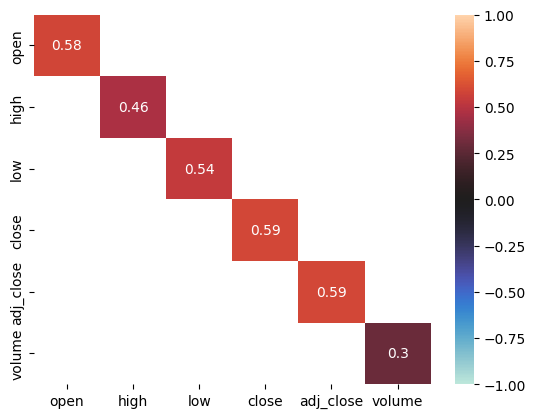

In [106]:
netflix_viz.correlation_heatmap(amzn)

In [121]:
google_viz = stock_analysis.StockVisualizer(goog)

<Axes: ylabel='price'>

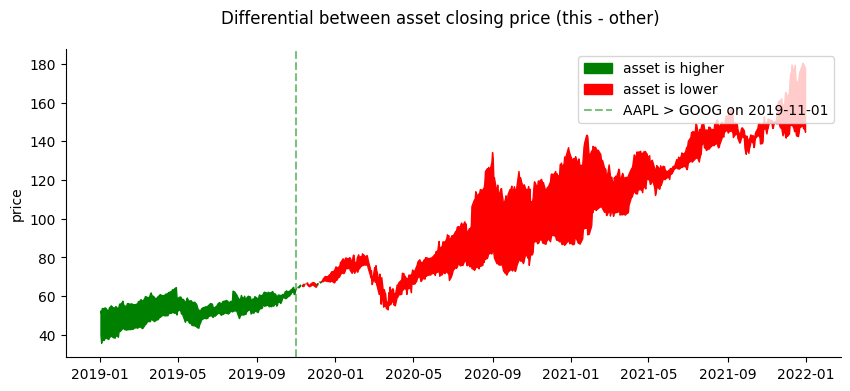

In [126]:
tsla = reader.get_ticker_data("TSLA")
change_date = ( aapl.close > goog.close ).idxmax()
ax = google_viz.fill_between_other(aapl)
netflix_viz.add_reference_line(ax, x=change_date, color="green", linestyle="--", alpha=0.5,
                               label=f"AAPL > GOOG on {change_date.date()}")

In [108]:
nflx.close

date
2019-01-02    267.660004
2019-01-03    271.200012
2019-01-04    297.570007
2019-01-07    315.339996
2019-01-08    320.269989
                 ...    
2021-12-27    613.119995
2021-12-28    610.710022
2021-12-29    610.539978
2021-12-30    612.090027
2021-12-31    602.440002
Name: close, Length: 757, dtype: float64

In [123]:
aapl.close

date
2019-01-02     39.480000
2019-01-03     35.547501
2019-01-04     37.064999
2019-01-07     36.982498
2019-01-08     37.687500
                 ...    
2021-12-27    180.330002
2021-12-28    179.289993
2021-12-29    179.380005
2021-12-30    178.199997
2021-12-31    177.570007
Name: close, Length: 757, dtype: float64

In [110]:
(tsla.close > nflx.close)

date
2019-01-02    False
2019-01-03    False
2019-01-04    False
2019-01-07    False
2019-01-08    False
              ...  
2021-12-27    False
2021-12-28    False
2021-12-29    False
2021-12-30    False
2021-12-31    False
Name: close, Length: 757, dtype: bool